In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data=pd.read_csv('/content/class_participation (3).csv')

In [16]:
data

,Student,Date,Participation
0,Aarav,2024-12-01,0
1,Aarav,2024-12-02,0
2,Aarav,2024-12-03,0
3,Aarav,2024-12-04,1
4,Aarav,2024-12-05,1
...,...,...,...
95,Arjun,2024-12-06,1
96,Arjun,2024-12-07,0
97,Arjun,2024-12-08,0
98,Arjun,2024-12-09,0


In [15]:
# Inspect the data
data.head() # Display the first few rows

,Student,Date,Participation
0,Aarav,2024-12-01,0
1,Aarav,2024-12-02,0
2,Aarav,2024-12-03,0
3,Aarav,2024-12-04,1
4,Aarav,2024-12-05,1


In [19]:
data.shape # Get the number of rows and columns

(100, 3)

In [17]:
print(data.info())  # Summary of the datase

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student        100 non-null    object
 1   Date           100 non-null    object
 2   Participation  100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB
None


In [18]:
data['Student'].unique()

array(['Aarav', 'Vivaan', 'Aditya', 'Krishna', 'Diya', 'Ananya', 'Ishaan',
       'Riya', 'Kavya', 'Arjun'], dtype=object)

# **Data Cleaning**

In [23]:
# the 'Date' column is in datetime format
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

In [24]:
# Extract day, month, and year from 'Date'
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [26]:
# Display the updated dataset
data.head()

,Student,Date,Participation,Day,Month,Year
0,Aarav,2024-12-01,0,1,12,2024
1,Aarav,2024-12-02,0,2,12,2024
2,Aarav,2024-12-03,0,3,12,2024
3,Aarav,2024-12-04,1,4,12,2024
4,Aarav,2024-12-05,1,5,12,2024


In [27]:
# Check for missing values
data.isnull().sum()  # Count missing values in each column


,0
Student,0
Date,0
Participation,0
Day,0
Month,0
Year,0


# **Transform Data for Heatmap**

In [28]:
# Pivot data for heatmap
heatmap_data = data.pivot_table(index='Student', columns='Date', values='Participation', fill_value=0)

In [29]:
heatmap_data

Date,2024-12-01,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-07,2024-12-08,2024-12-09,2024-12-10
Student,,,,,,,,,,
Aarav,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
Aditya,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
Ananya,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Arjun,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Diya,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
Ishaan,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
Kavya,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Krishna,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
Riya,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [30]:
# Check the transformed data
heatmap_data.head()

Date,2024-12-01,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-07,2024-12-08,2024-12-09,2024-12-10
Student,,,,,,,,,,
Aarav,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
Aditya,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
Ananya,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Arjun,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Diya,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


# **Create the Heatmap**

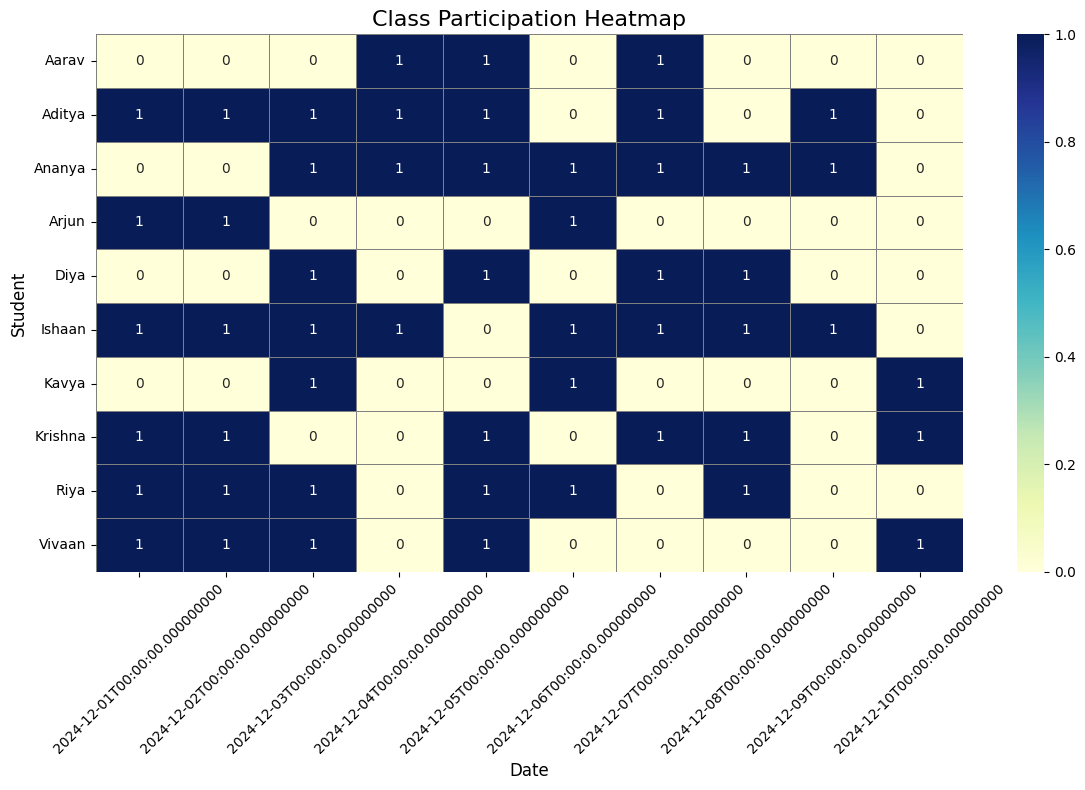

In [32]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='gray')

# Customize the plot
plt.title('Class Participation Heatmap', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Student', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

- The heatmap visualizes class participation trends, with students on the y-axis and dates on the x-axis.  
- Darker squares (value = 1) indicate participation, while lighter squares (value = 0) represent no participation.  
- Students such as **Aditya**, **Ishaan**, and **Riya** show consistent participation.  
- Students like **Aarav** and **Ananya** have gaps, highlighting inconsistent engagement.  


# **Count Participation per Student**

In [34]:
# Calculate total participation per student
student_participation = data.groupby('Student')['Participation'].sum().reset_index()

# Sort by total participation
student_participation = student_participation.sort_values(by='Participation', ascending=False)

# Display results
student_participation

,Student,Participation
5,Ishaan,8
1,Aditya,7
2,Ananya,7
7,Krishna,6
8,Riya,6
9,Vivaan,5
4,Diya,4
0,Aarav,3
3,Arjun,3
6,Kavya,3


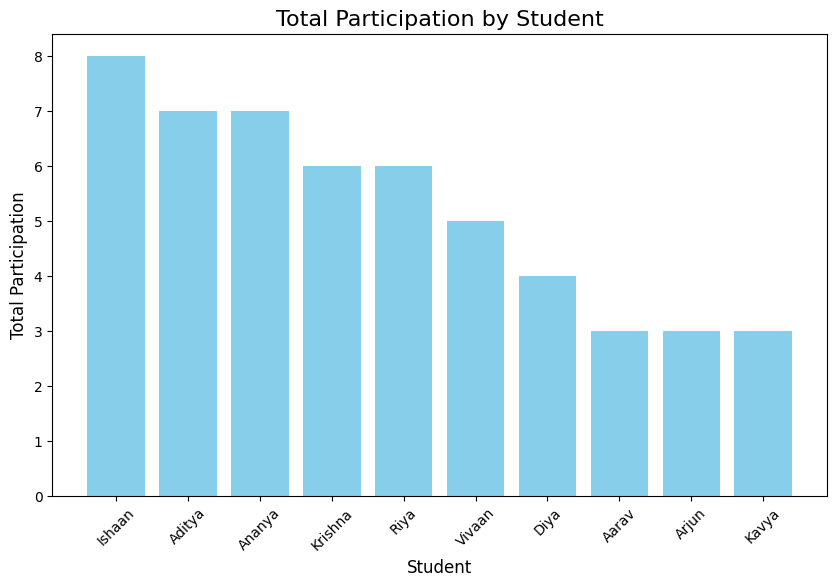

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(student_participation['Student'], student_participation['Participation'], color='skyblue')
plt.title('Total Participation by Student', fontsize=16)
plt.xlabel('Student', fontsize=12)
plt.ylabel('Total Participation', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Ishaan participates more and kavya less

# **Participation Trends Over Time**

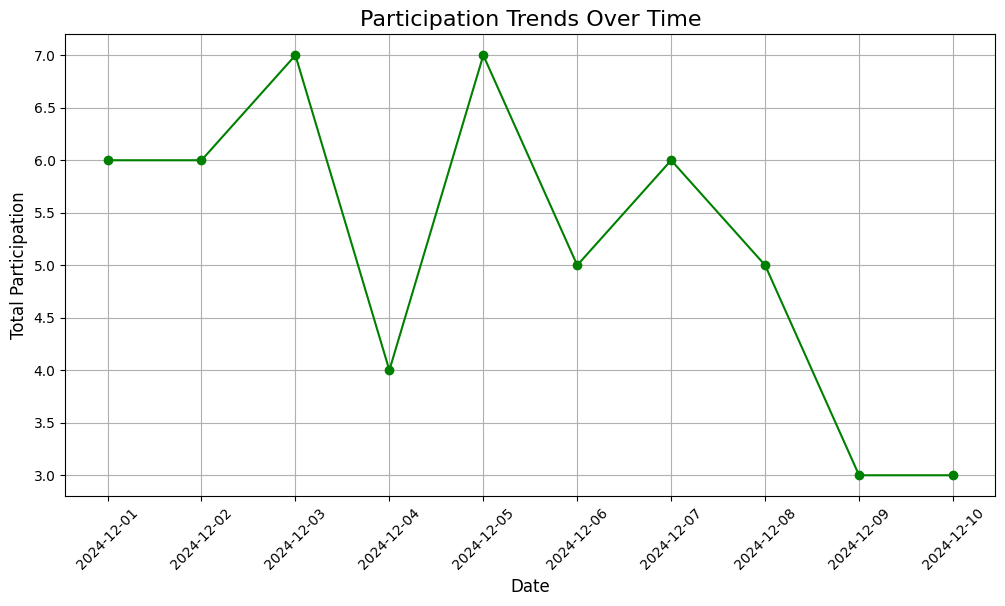

In [36]:
# Calculate total participation per date
date_participation = data.groupby('Date')['Participation'].sum().reset_index()

# Plot participation trends
plt.figure(figsize=(12, 6))
plt.plot(date_participation['Date'], date_participation['Participation'], marker='o', linestyle='-', color='green')
plt.title('Participation Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Participation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


- The line chart shows participation trends over time, with a significant drop in participation observed after **December 7th**.  
- Peak participation is noted on **December 3rd** and **December 6th**, reaching a total of 7 students.  
- Consistently declining engagement toward **December 10th** highlights a need for intervention to improve participation.  


# **Participation Heatmap by Month and Day**

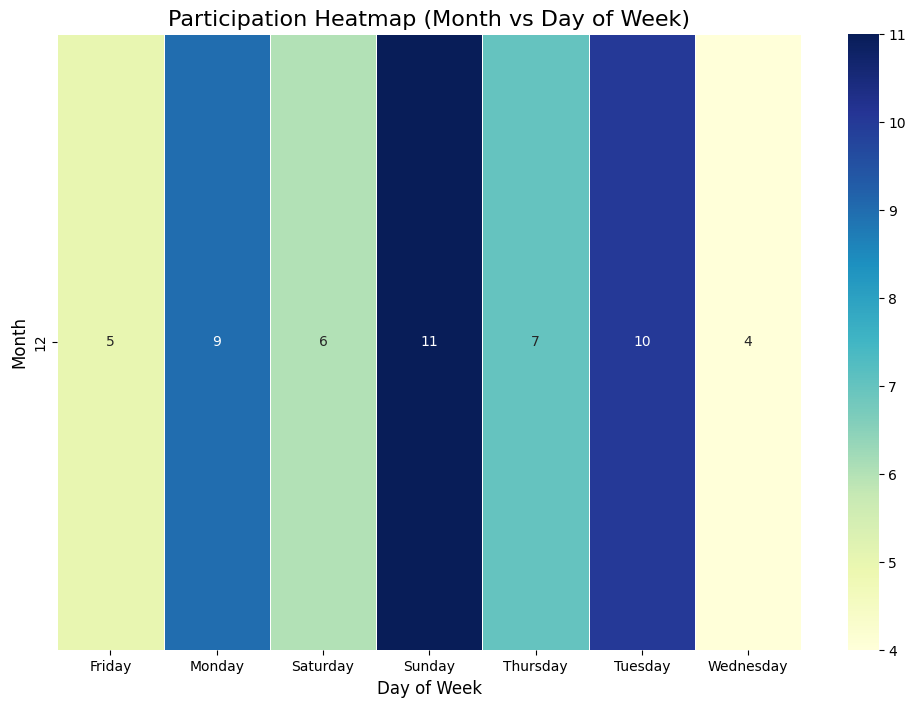

In [37]:
# Create pivot table for participation by month and day
data['Day_of_Week'] = data['Date'].dt.day_name()  # Extract day names
heatmap_month_day = data.pivot_table(index='Month', columns='Day_of_Week', values='Participation', aggfunc='sum', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_month_day, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Participation Heatmap (Month vs Day of Week)', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.show()


# **Participation Rate (Engagement Level)**

In [38]:
# Calculate total participation and sessions
total_sessions = data['Date'].nunique()
data['Participation_Rate'] = (data.groupby('Student')['Participation'].transform('sum') / total_sessions) * 100

# Extract participation rate for each student
participation_rate = data[['Student', 'Participation_Rate']].drop_duplicates().sort_values(by='Participation_Rate', ascending=False)

# Display results
participation_rate

,Student,Participation_Rate
60,Ishaan,80.0
20,Aditya,70.0
50,Ananya,70.0
30,Krishna,60.0
70,Riya,60.0
10,Vivaan,50.0
40,Diya,40.0
0,Aarav,30.0
80,Kavya,30.0
90,Arjun,30.0


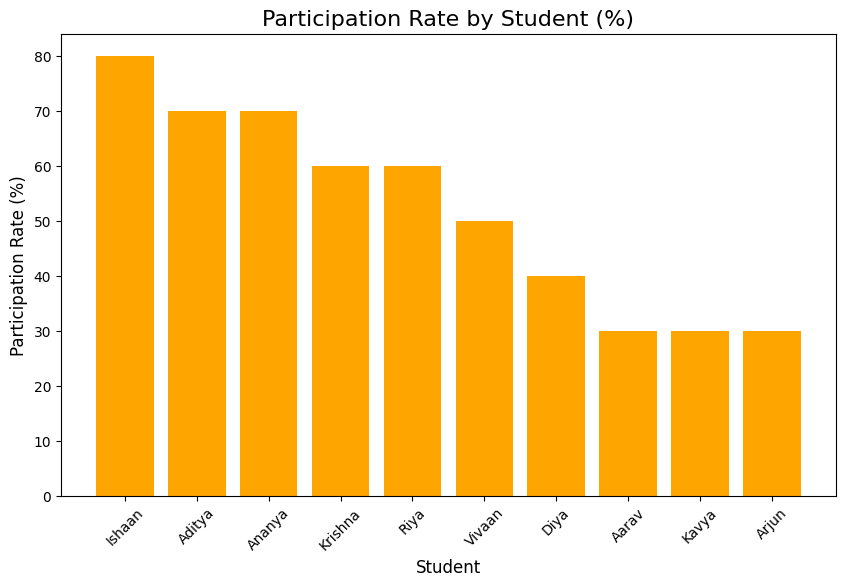

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(participation_rate['Student'], participation_rate['Participation_Rate'], color='orange')
plt.title('Participation Rate by Student (%)', fontsize=16)
plt.xlabel('Student', fontsize=12)
plt.ylabel('Participation Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Ishaan participates more and arjun less